In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
'''
arithematic brownian motion

dS = mu * dt + sigma * dW_t
'''
npaths = 50
nsteps = 200
T = 1
dt = T/nsteps
t = np.arange(0, T+dt, dt)

class ABM:
    def __init__(self, mu, sigma, n_steps, n_paths, s, T):
        self.mu = mu
        self.sigma = sigma
        self.n_steps = n_steps
        self.n_paths = n_paths
        self.dt = T/n_steps
        self.t = np.arange(0, T+dt, dt)
        self.s = s
        self.T = T
    
    def get_all_paths(self):
        '''
        S_{t + delta} = X_t + mu * dt + sigma * sqrt(dt) * randomNormals()
        '''
        randomNormals = np.random.randn(self.n_paths, self.n_steps) # This gives a 2D array of shape n_paths, n_steps
        dW = randomNormals * np.sqrt(self.dt) # gives the right side of the RHS
        dS = dt* self.mu + dW * self.sigma # is a 2d array
        
        dS[:, 0] = self.s # initialize start
        S = np.cumsum(dS, axis=1) # every row is a proper path now
        
        return S
    
    def get_all_expected_values(self):
        '''gives expected value at every time step (n_steps + 1)'''
        return self.mu * self.t + self.s
    
    def simulate(self, expected=False, ax=None):
        plot_df = pd.DataFrame(self.get_all_paths().T)
        if expected == True:
            plot_df['Expected Path']=self.get_all_expected_values()
        fig = sns.lineplot(plot_df, ax=ax)
        plt.title(f'ABM with mu= {self.mu}, sigma= {self.sigma}, n_steps: {self.n_steps}')
        return plt.show()


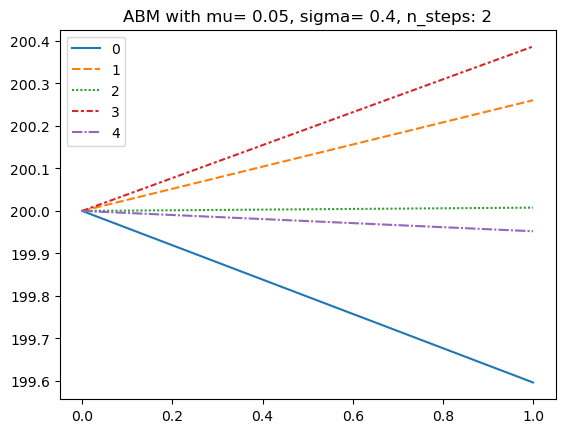

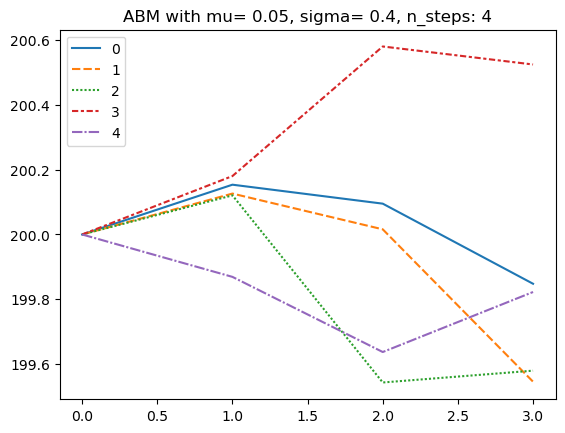

In [127]:
n_paths = 5
n_steps = 2
T = 1
mu = 0.05
sigma = 0.4
s = 200

b = ABM(mu, sigma, n_steps, n_paths, s, T)
b.simulate()
b.n_steps *= 2
b.simulate()

In [121]:
'''
Geometric Brownian Motion

dS/s = mu * dt + sigma * dW_t
'''
class GBM:
    def __init__(self, mu, sigma, n_steps, n_paths, s, T):
        self.mu = mu
        self.sigma = sigma
        self.n_steps = n_steps
        self.n_paths = n_paths
        self.dt = T/n_steps
        self.t = np.arange(0, T+dt, dt) # like delta
        self.s = s
        self.T = T
    
    def get_all_paths(self):
        randomNormals = np.random.randn(self.n_paths, self.n_steps) # This gives a 2D array of shape n_paths, n_steps
        dW = randomNormals * np.sqrt(self.dt) # gives the right side of the RHS
        dS = (self.mu - 0.5 * self.sigma ** 2)*dt + self.sigma * dW
        
        dS[:, 0] = 0 # initialize start
        S = np.cumsum(dS, axis=1) # every row is a proper path now
        
        S = self.s * np.exp(S)
        
        return S
    
    def simulate(self, expected=False, ax=None):
        plot_df = pd.DataFrame(self.get_all_paths().T)
        if expected == True:
            plot_df['Expected Path']=self.get_all_expected_values()
        fig = sns.lineplot(plot_df, ax=ax)
        plt.title(f'GBM with mu= {self.mu}, sigma= {self.sigma}, n_steps: {self.n_steps}')
        return plt.show()    

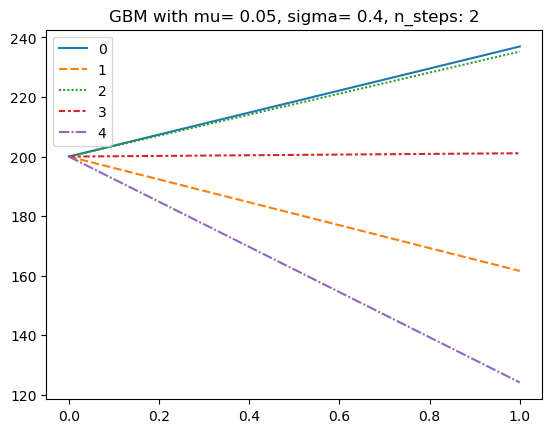

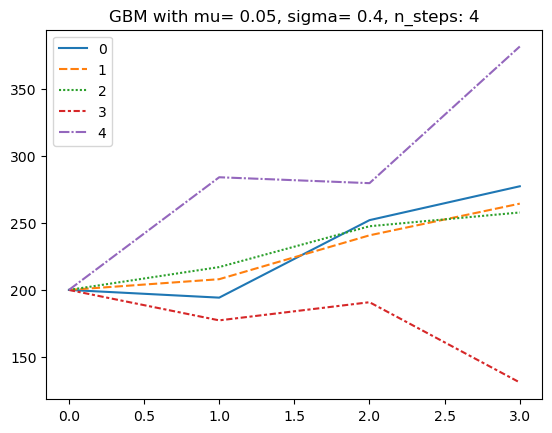

In [124]:
n_paths = 5
n_steps = 2
T = 1
dt = T/n_steps
t = np.arange(0, T+dt, dt)
mu = 0.05
sigma = 0.4
s = 200

b = GBM(mu, sigma, n_steps, n_paths, s, T)
b.simulate()
b.n_steps = 4
b.simulate()